# Unconstrained Optimization Algorithms: 
### Newton's Method & Conjugate Gradient Method

## Notes from the readings:
1. Conjugate Gradient Method:
Search in n conjugate directions. Where Q is the Hassian of function F.
$${\langle{u,v}\rangle}=u^TQv=0$$

$${\Delta} f\left(x\right)=Qx-b \rightarrow Qx=b$$


## Pre-Class Work:

In [48]:
# Importing packages
import matplotlib.pyplot as plt
from numpy import linalg as lp
from matplotlib import rc
import numpy as np
from PIL import Image
rc('font',**{'family':'serif','serif':['Computer Modern']})
rc('text', usetex=True)

%matplotlib inline

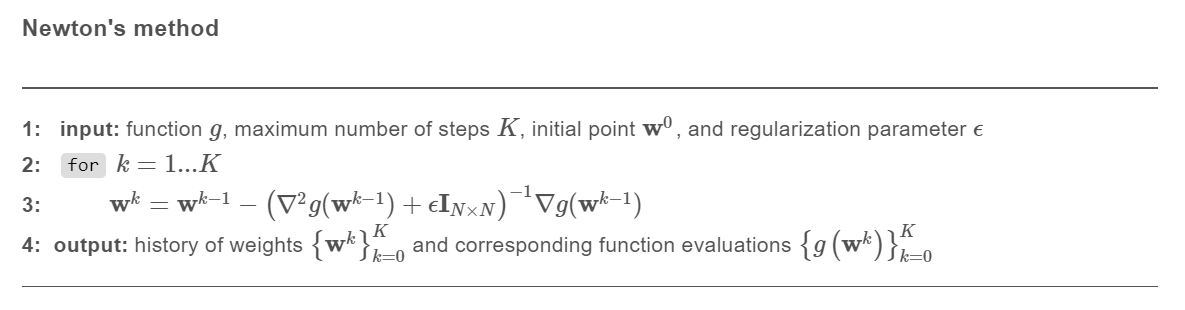

In [49]:
Image.open("Newton's Method.png")

In [40]:
# The Newton Method applied to Rosenbrock function
"""
The method does have a steplength parameter α 
it is implicitly set to  α=1  and so appears 'invisible'
"""
f = lambda x: 10*(x[1] - x[0]**2)**2 + (x[0] - 1)**2
grad_f = lambda x: [2*(x[0]-1) + 200*(x[1] - x[0]**2)*(-2*x[0]), 200*(x[1]-x[0]**2)]
hessian_f = lambda x: [[1200*x[0]**2-400*x[1]+2, -400*x[0]], [-400*x[0], 200]]

x1 = np.array([])
x2 = np.array([])
x = np.array([-.8,1])
tol = np.inf
k = 0
step = 1

while tol >= 1e-7:
    hessian_inv = np.linalg.inv(hessian_f(x))
    x_new = x - step * np.matmul(hessian_inv, grad_f(x))
    x1 = np.append(x1, x_new[0])
    x2 = np.append(x2, x_new[1])
    print(x_new)
    tol = np.linalg.norm(x_new - x, 2)
    x = x_new
    k+=1
    
print("\nFunction Value: ", f(x), "\nAt X = ", x, " after", k, "iterations")

[-0.82535211  0.68056338]
[ 0.79208505 -1.98870424]
[0.79248166 0.62802703]
[0.99999347 0.95692579]
[0.99999415 0.9999883 ]
[1. 1.]
[1. 1.]

Function Value:  0.0 
At X =  [1. 1.]  after 7 iterations


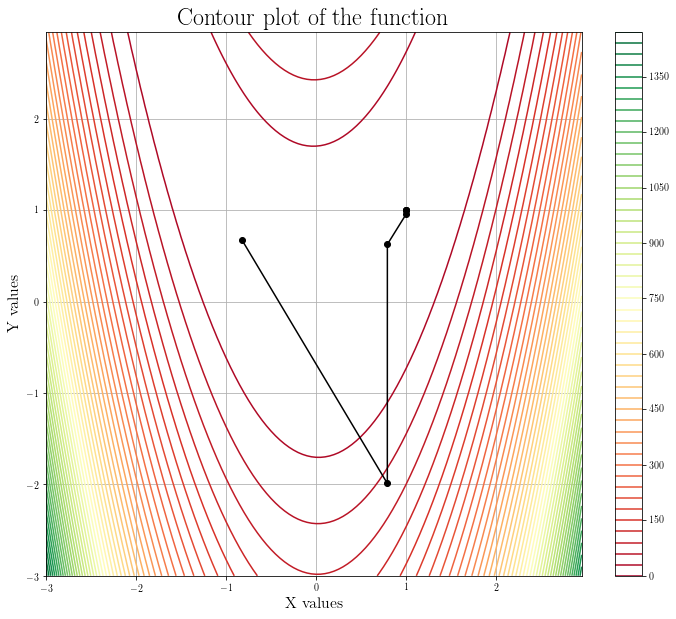

In [47]:
x = np.arange(-3, 3, 0.05)
y = np.arange(-3, 3, 0.05)

X, Y = np.meshgrid(x, y)
Z = 10*(Y - X**2)**2 + (X - 1)**2

plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, 50,cmap='RdYlGn')
plt.plot(x1, x2, 'o-', color='black')
plt.xlabel('X values', fontsize=16)
plt.ylabel('Y values', fontsize=16)
plt.title('Contour plot of the function', fontsize=24)
plt.colorbar()
plt.grid(True)
plt.show()